In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.initializers import he_normal

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normaliser les images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convertir les étiquettes en catégories one-hot
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
def create_model(layers=[Flatten(input_shape=(28, 28)), Dense(10, activation='softmax')], epochs=10, batch_size=128, learning_rate=0.001, validation_split=0.2):
    model = Sequential(layers)

    # Compiler le modèle
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle et sauvegarder l'historique
    history = model.fit(train_images, train_labels, epochs=epochs,
                        batch_size=batch_size, validation_split=validation_split, shuffle=True, validation_data=(test_images, test_labels), verbose=2)

    # Évaluer le modèle
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
    print('Test accuracy:', test_acc)
    print('Test loss:', test_loss)

    # Tracer la courbe d'apprentissage
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.tight_layout()
    #plt.show()

    # Prédire les classes des images de test
    predict_x = model.predict(test_images, verbose=0)
    classes_x = np.argmax(predict_x, axis=1)

    # Calculer la matrice de confusion
    cm = confusion_matrix(test_labels.argmax(axis=1), classes_x)
    print("Confusion Matrix: \n", cm)

    # Afficher la matrice de confusion
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    #plt.show()

# Perceptron simple

Epoch 1/10
469/469 - 1s - loss: 0.6764 - accuracy: 0.8316 - val_loss: 0.3846 - val_accuracy: 0.9018 - 1s/epoch - 3ms/step
Epoch 2/10
469/469 - 1s - loss: 0.3624 - accuracy: 0.9026 - val_loss: 0.3209 - val_accuracy: 0.9122 - 722ms/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.3198 - accuracy: 0.9122 - val_loss: 0.2986 - val_accuracy: 0.9178 - 732ms/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.3005 - accuracy: 0.9167 - val_loss: 0.2843 - val_accuracy: 0.9218 - 723ms/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.2881 - accuracy: 0.9198 - val_loss: 0.2789 - val_accuracy: 0.9225 - 725ms/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.2796 - accuracy: 0.9222 - val_loss: 0.2742 - val_accuracy: 0.9227 - 688ms/epoch - 1ms/step
Epoch 7/10
469/469 - 1s - loss: 0.2740 - accuracy: 0.9234 - val_loss: 0.2710 - val_accuracy: 0.9237 - 837ms/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.2694 - accuracy: 0.9253 - val_loss: 0.2683 - val_accuracy: 0.9241 - 798ms/epoch - 2ms/step
Epo

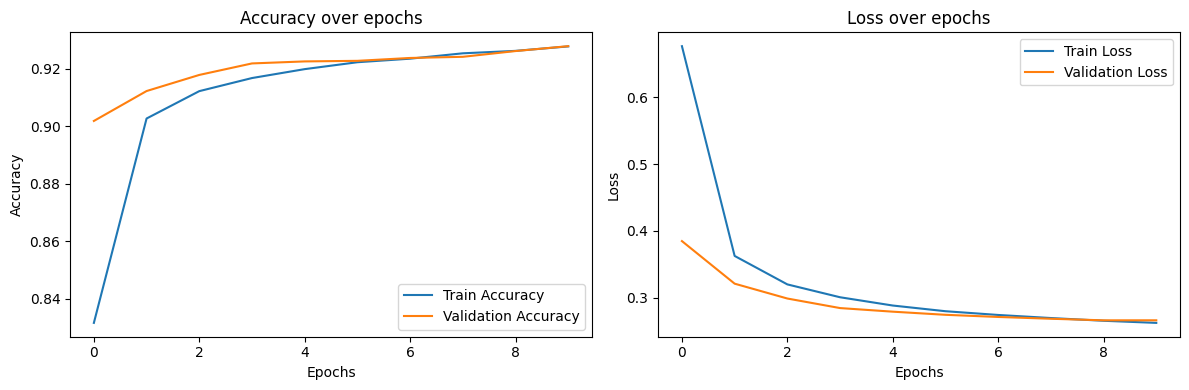

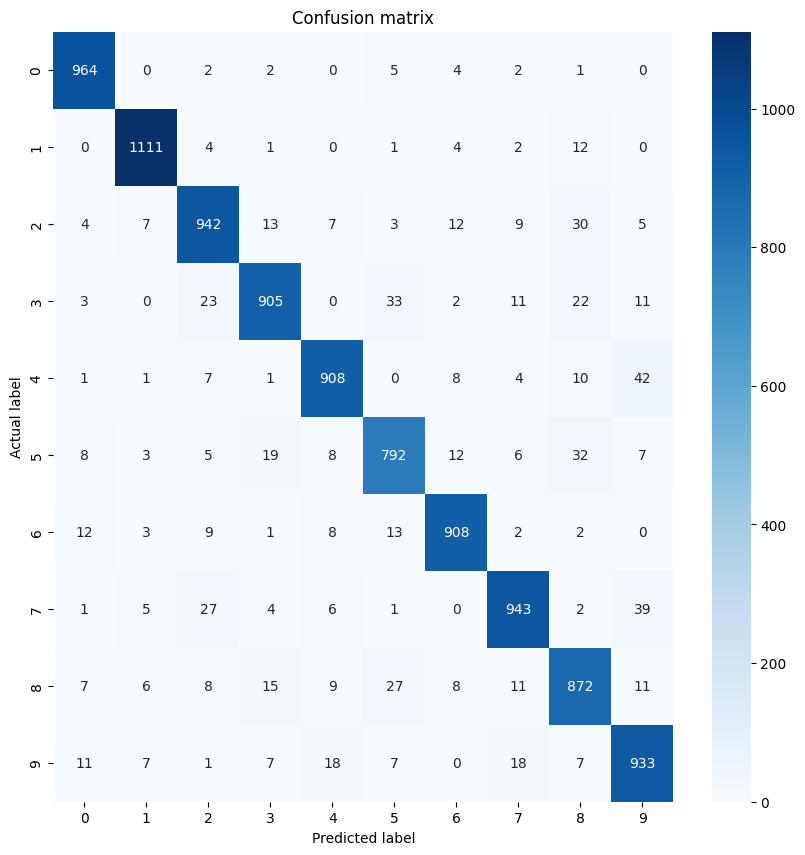

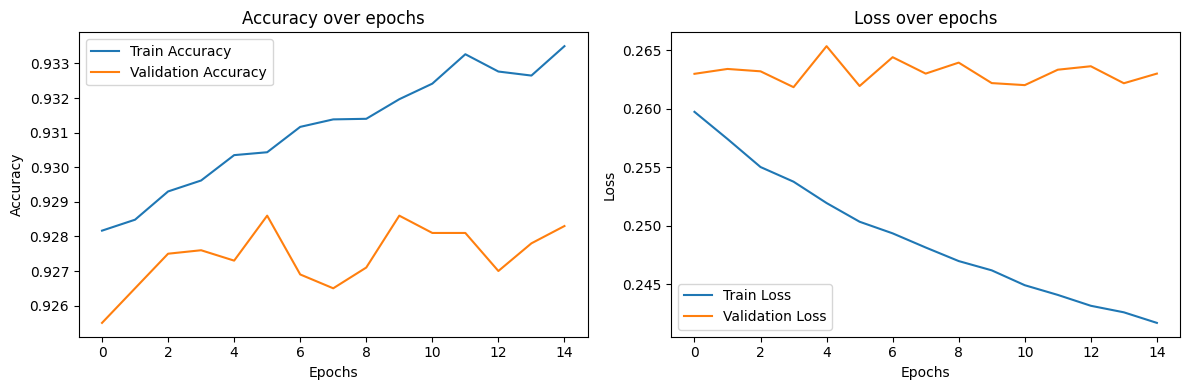

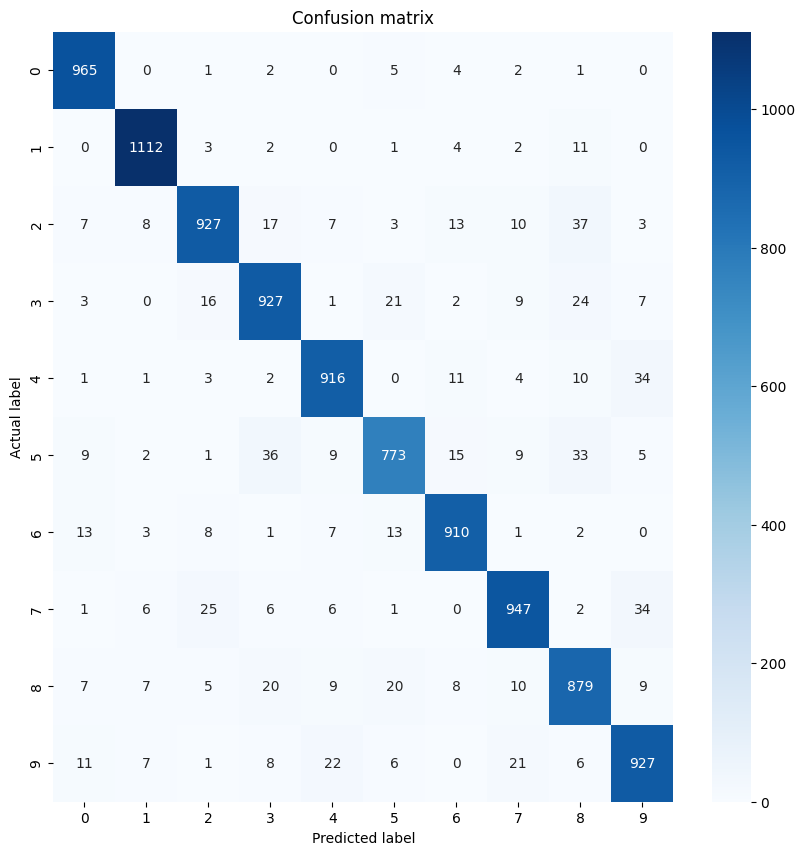

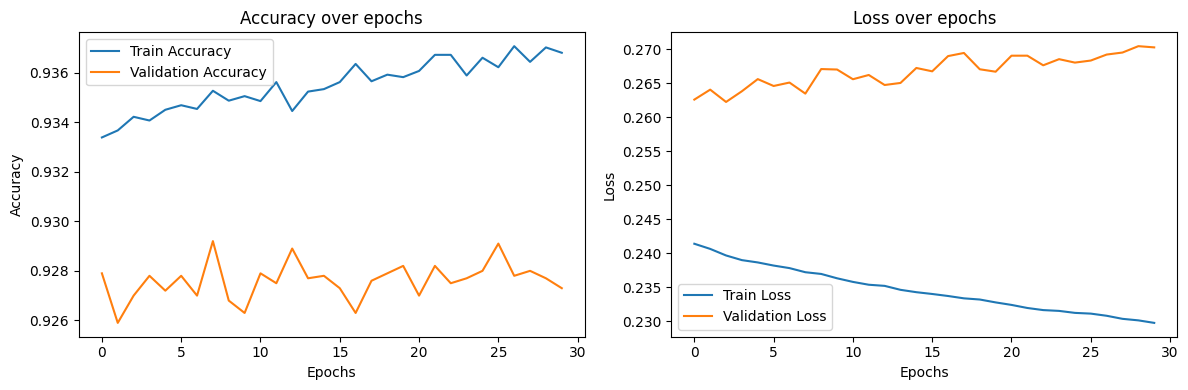

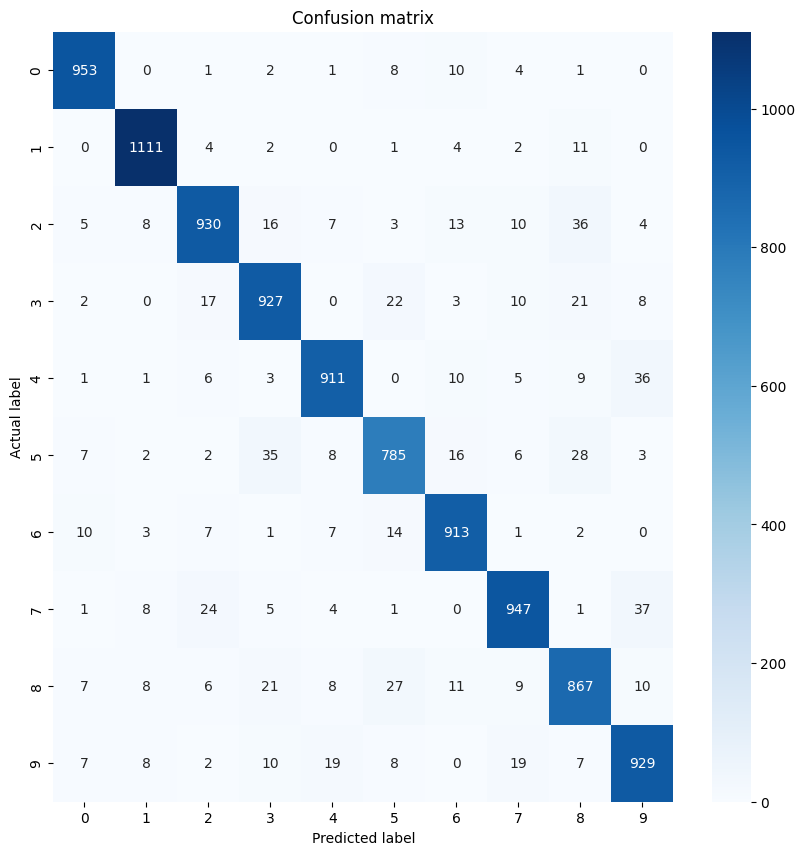

In [4]:
create_model()
create_model(epochs=15)
create_model(epochs=30)

# Perceptron à deux couches

Epoch 1/10
469/469 - 2s - loss: 0.4264 - accuracy: 0.8844 - val_loss: 0.2300 - val_accuracy: 0.9342 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.2056 - accuracy: 0.9422 - val_loss: 0.1736 - val_accuracy: 0.9508 - 856ms/epoch - 2ms/step
Epoch 3/10
469/469 - 1s - loss: 0.1571 - accuracy: 0.9542 - val_loss: 0.1422 - val_accuracy: 0.9560 - 862ms/epoch - 2ms/step
Epoch 4/10
469/469 - 1s - loss: 0.1285 - accuracy: 0.9628 - val_loss: 0.1199 - val_accuracy: 0.9630 - 863ms/epoch - 2ms/step
Epoch 5/10
469/469 - 1s - loss: 0.1089 - accuracy: 0.9683 - val_loss: 0.1109 - val_accuracy: 0.9644 - 902ms/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0948 - accuracy: 0.9730 - val_loss: 0.1011 - val_accuracy: 0.9682 - 976ms/epoch - 2ms/step
Epoch 7/10
469/469 - 1s - loss: 0.0837 - accuracy: 0.9760 - val_loss: 0.0947 - val_accuracy: 0.9693 - 975ms/epoch - 2ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0742 - accuracy: 0.9788 - val_loss: 0.0941 - val_accuracy: 0.9705 - 911ms/epoch - 2ms/step
Epo

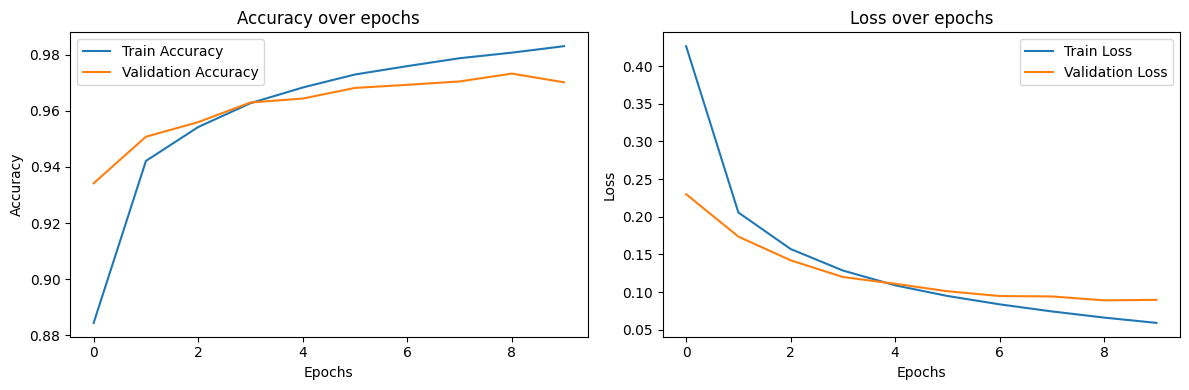

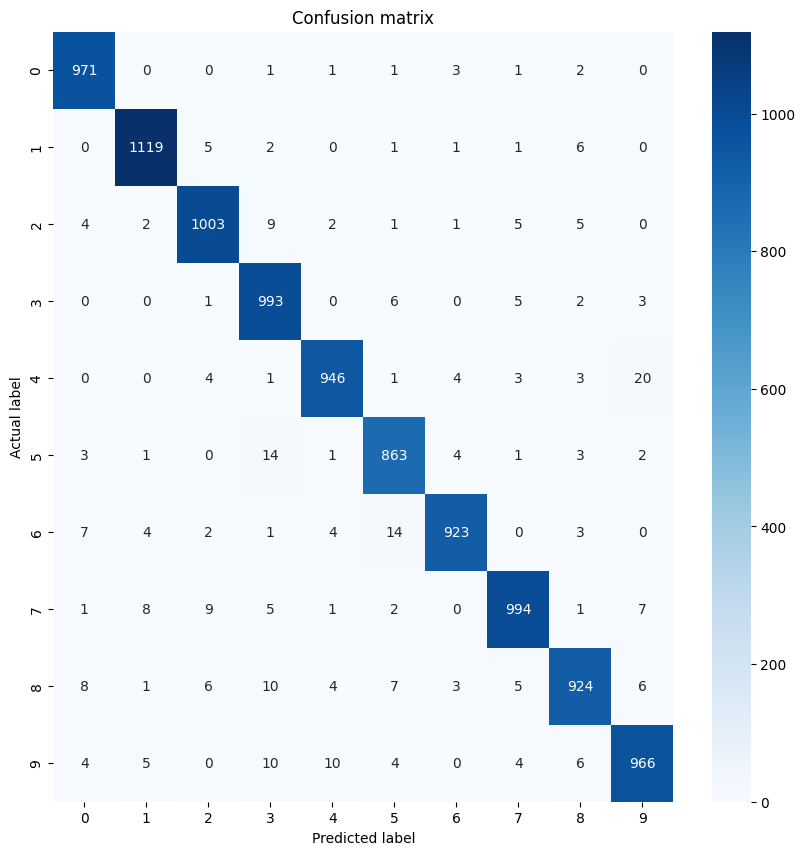

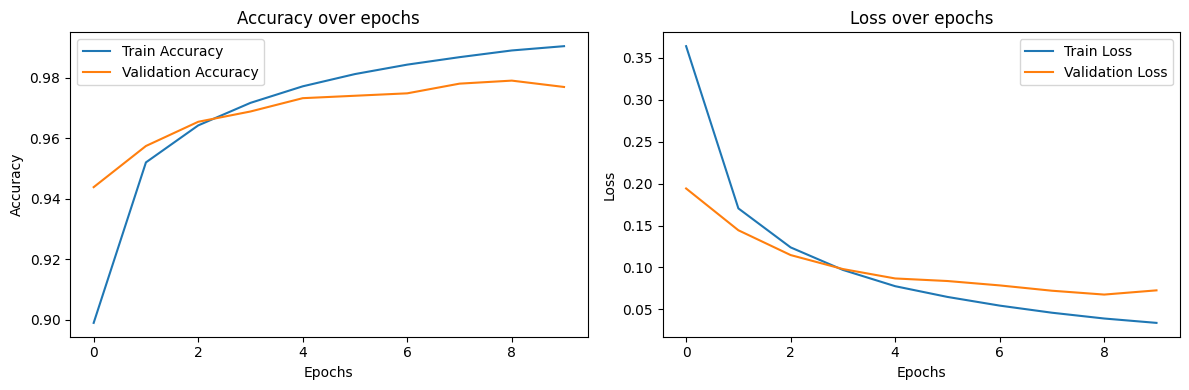

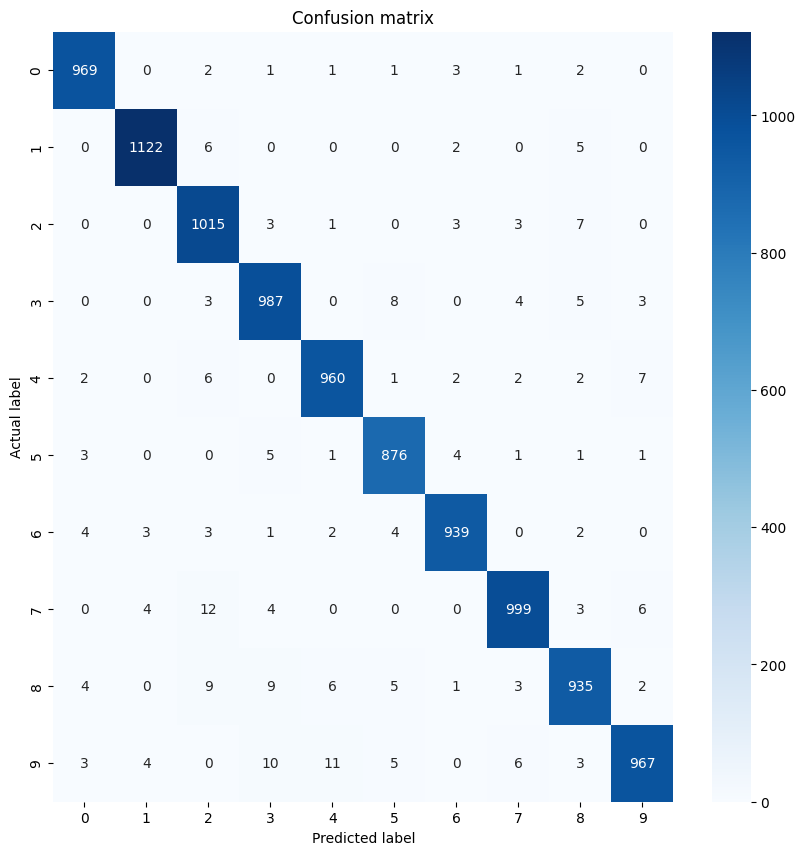

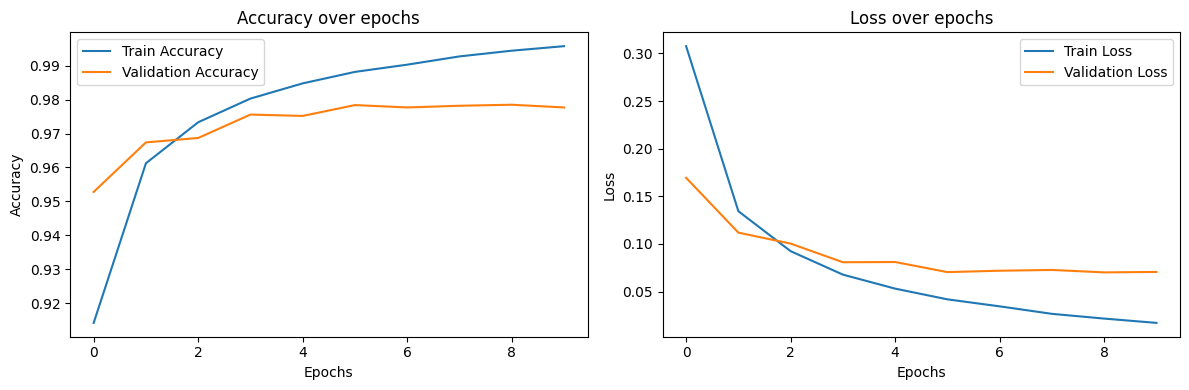

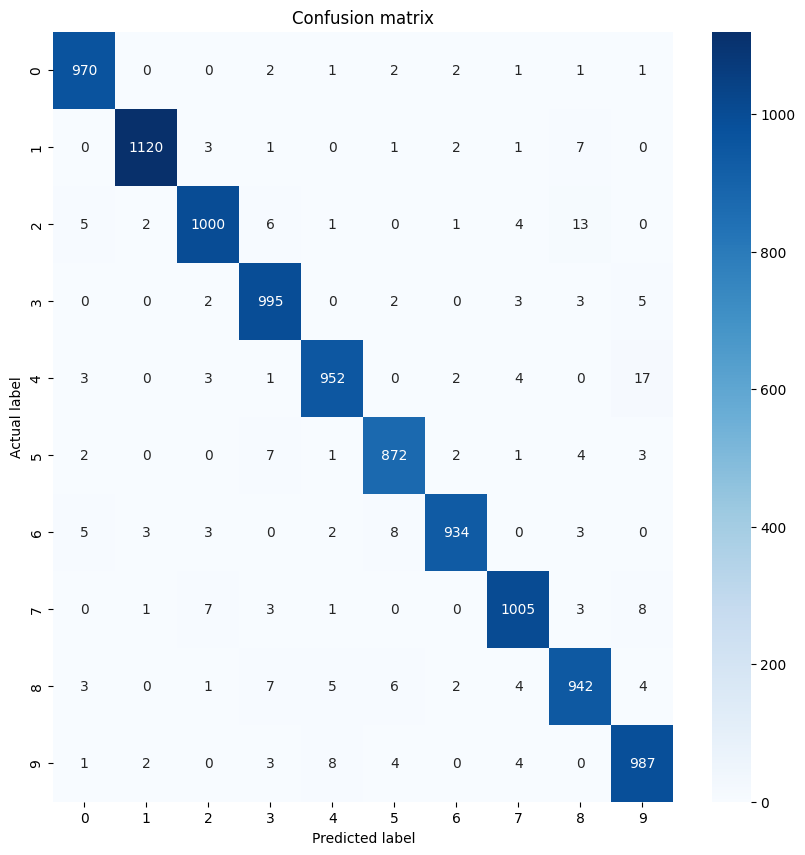

In [5]:
create_model(layers=[Flatten(input_shape=(28, 28)), Dense(64, activation='relu'), Dense(10, activation='softmax')])
create_model(layers=[Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(10, activation='softmax')])
create_model(layers=[Flatten(input_shape=(28, 28)), Dense(256, activation='relu'), Dense(10, activation='softmax')])

# Perceptron multicouche

Epoch 1/10
469/469 - 3s - loss: 0.3218 - accuracy: 0.9079 - val_loss: 0.1651 - val_accuracy: 0.9499 - 3s/epoch - 6ms/step
Epoch 2/10
469/469 - 2s - loss: 0.1296 - accuracy: 0.9615 - val_loss: 0.1030 - val_accuracy: 0.9681 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 2s - loss: 0.0881 - accuracy: 0.9735 - val_loss: 0.0911 - val_accuracy: 0.9722 - 2s/epoch - 3ms/step
Epoch 4/10
469/469 - 2s - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.0841 - val_accuracy: 0.9730 - 2s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0519 - accuracy: 0.9843 - val_loss: 0.0801 - val_accuracy: 0.9741 - 1s/epoch - 3ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0408 - accuracy: 0.9876 - val_loss: 0.0775 - val_accuracy: 0.9763 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 1s - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.0707 - val_accuracy: 0.9780 - 1s/epoch - 3ms/step
Epoch 8/10
469/469 - 1s - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0688 - val_accuracy: 0.9788 - 1s/epoch - 3ms/step
Epoch 9/10
469/469 - 1s 

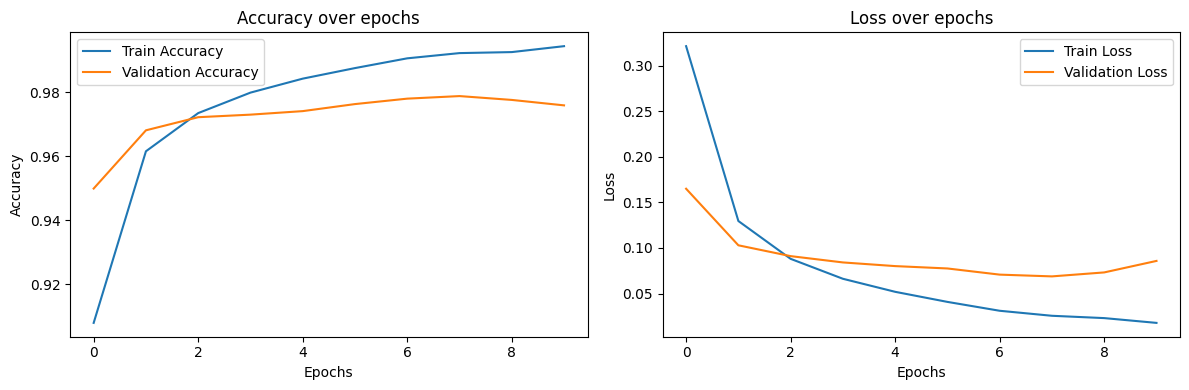

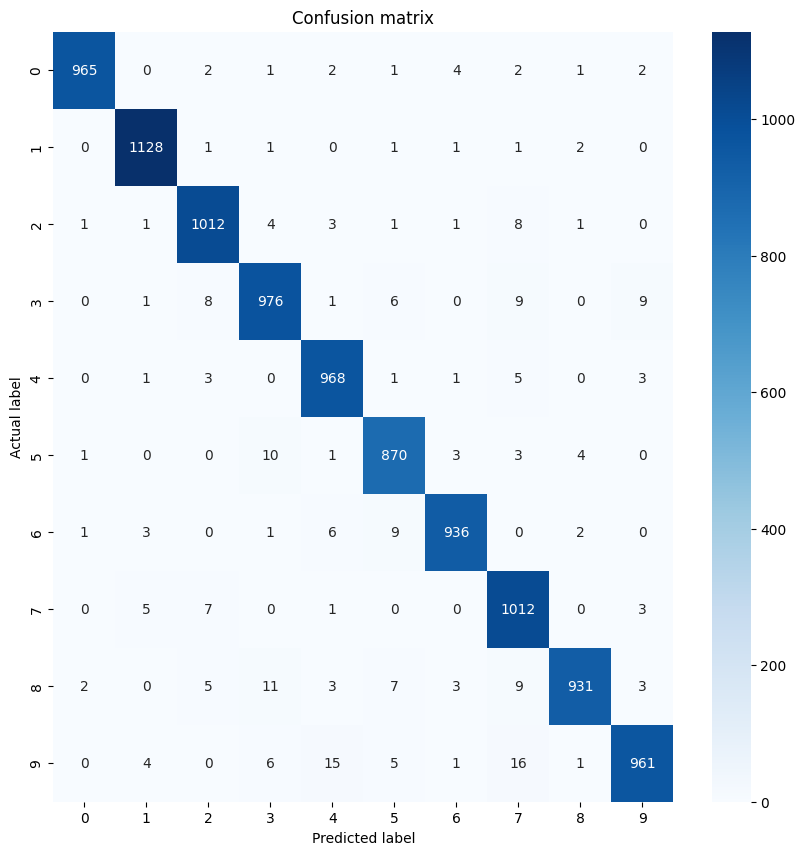

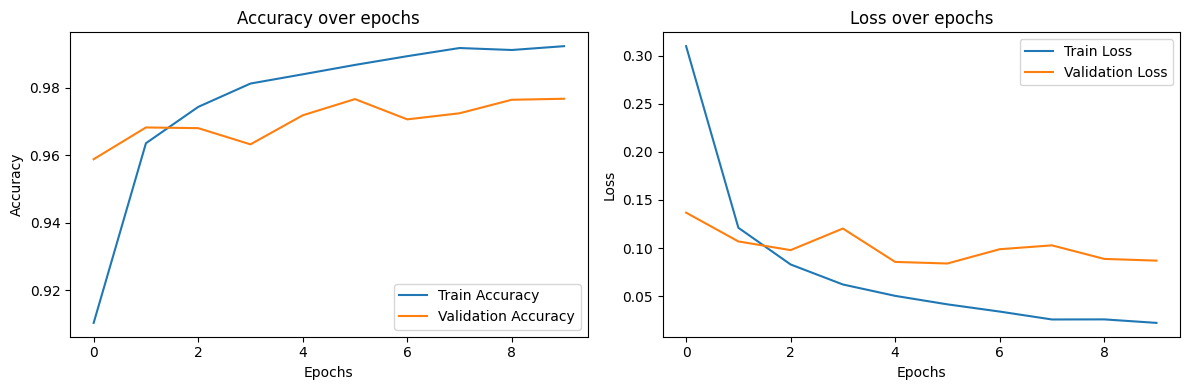

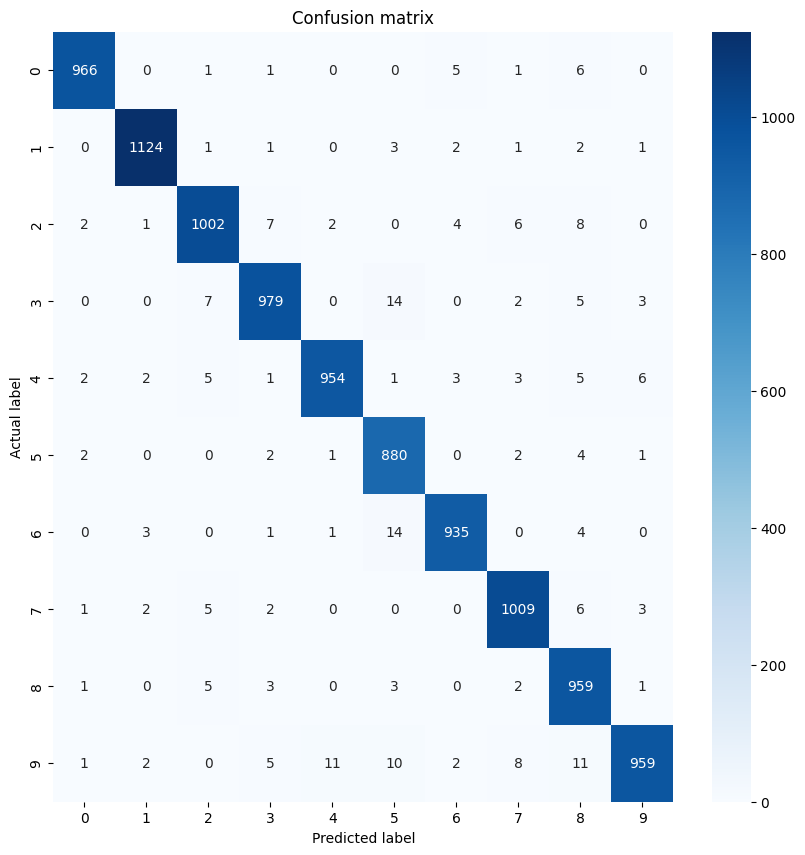

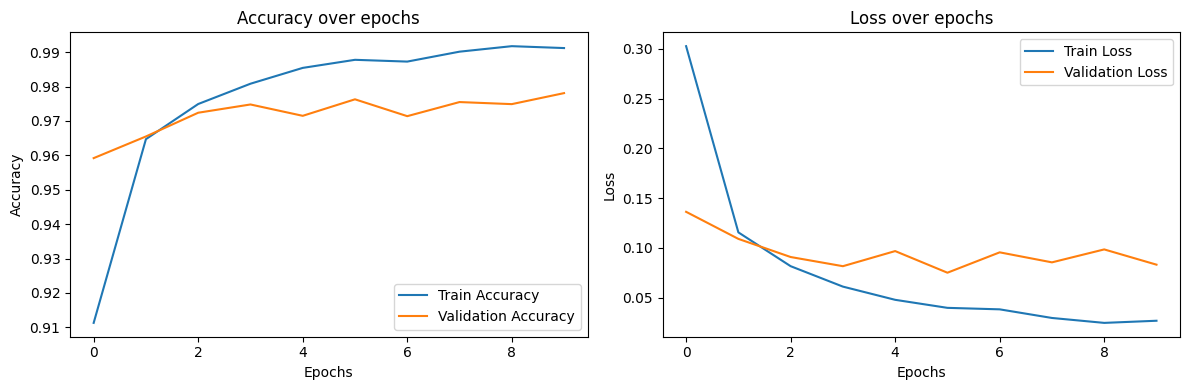

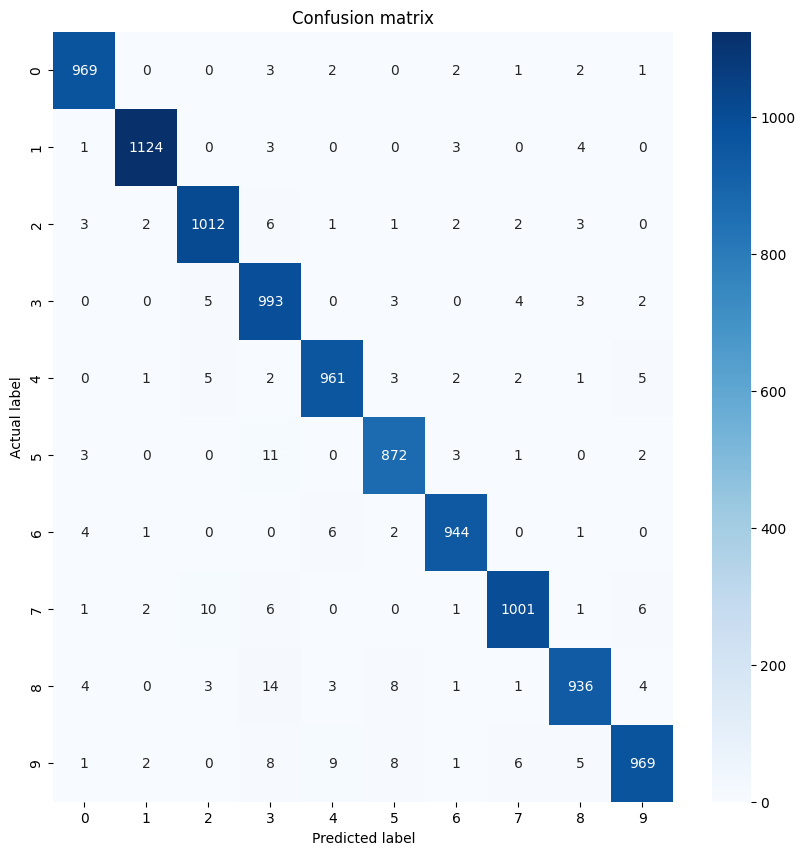

In [6]:
create_model(layers=[Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(128, activation='relu'), Dense(10, activation='softmax')])
create_model(layers=[Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(128, activation='relu'), Dense(128, activation='relu'), Dense(10, activation='softmax')])
create_model(layers=[Flatten(input_shape=(28, 28)), Dense(128, activation='relu'), Dense(128, activation='relu'), Dense(128, activation='relu'), Dense(128, activation='relu'), Dense(10, activation='softmax')])

# Réseau de neurones à convolution

Epoch 1/10
469/469 - 14s - loss: 0.2581 - accuracy: 0.9258 - val_loss: 0.1066 - val_accuracy: 0.9677 - 14s/epoch - 31ms/step
Epoch 2/10
469/469 - 13s - loss: 0.0844 - accuracy: 0.9758 - val_loss: 0.0641 - val_accuracy: 0.9793 - 13s/epoch - 27ms/step
Epoch 3/10
469/469 - 13s - loss: 0.0587 - accuracy: 0.9829 - val_loss: 0.0559 - val_accuracy: 0.9809 - 13s/epoch - 28ms/step
Epoch 4/10
469/469 - 13s - loss: 0.0440 - accuracy: 0.9875 - val_loss: 0.0535 - val_accuracy: 0.9805 - 13s/epoch - 28ms/step
Epoch 5/10
469/469 - 13s - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.0432 - val_accuracy: 0.9848 - 13s/epoch - 28ms/step
Epoch 6/10
469/469 - 14s - loss: 0.0286 - accuracy: 0.9914 - val_loss: 0.0503 - val_accuracy: 0.9836 - 14s/epoch - 29ms/step
Epoch 7/10
469/469 - 14s - loss: 0.0234 - accuracy: 0.9933 - val_loss: 0.0491 - val_accuracy: 0.9832 - 14s/epoch - 29ms/step
Epoch 8/10
469/469 - 13s - loss: 0.0193 - accuracy: 0.9943 - val_loss: 0.0400 - val_accuracy: 0.9862 - 13s/epoch - 27ms/step


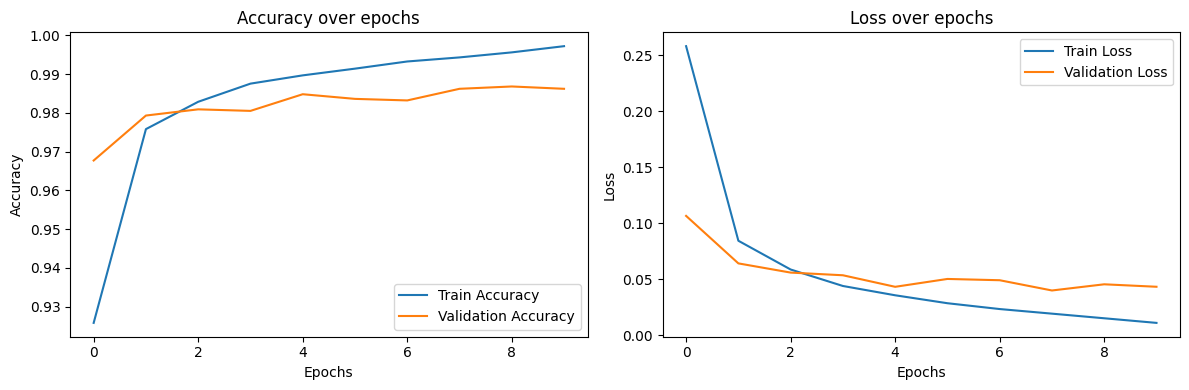

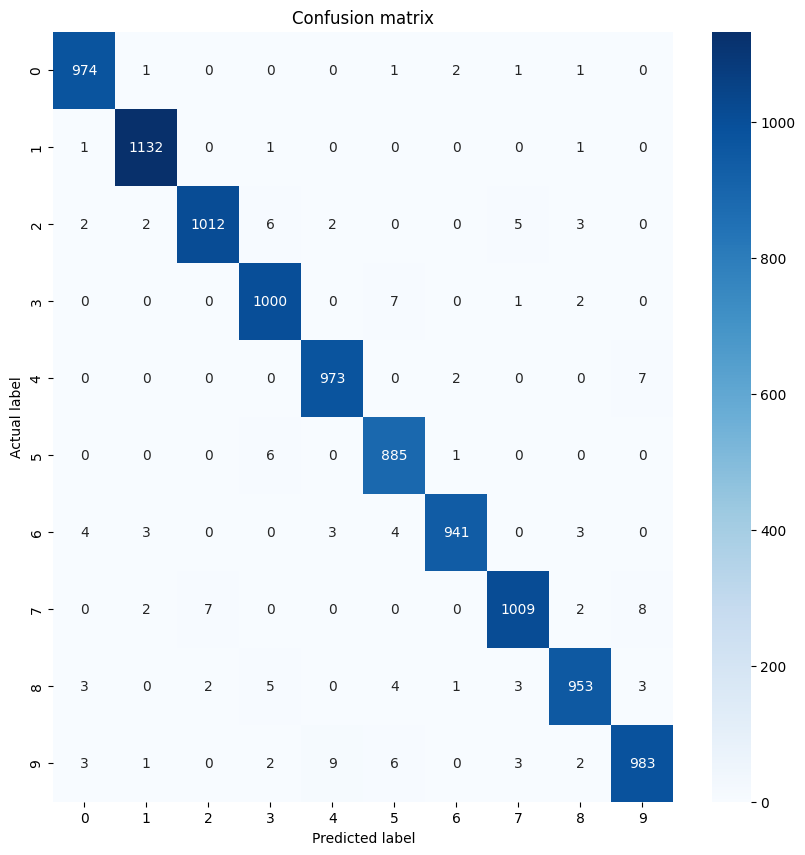

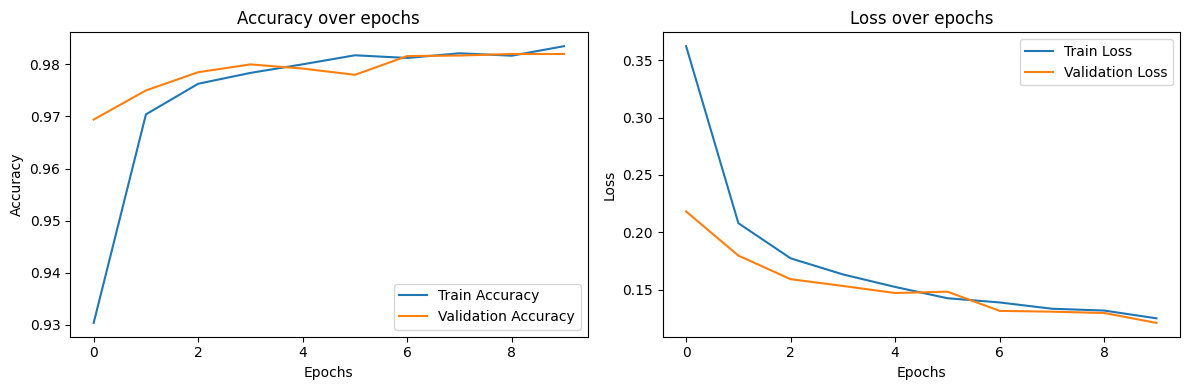

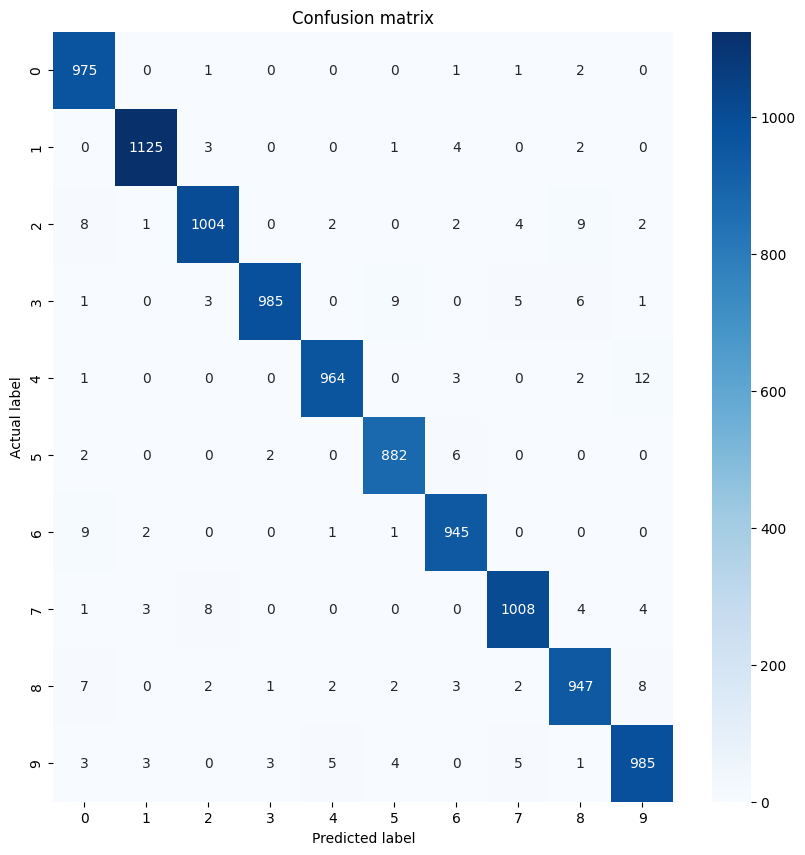

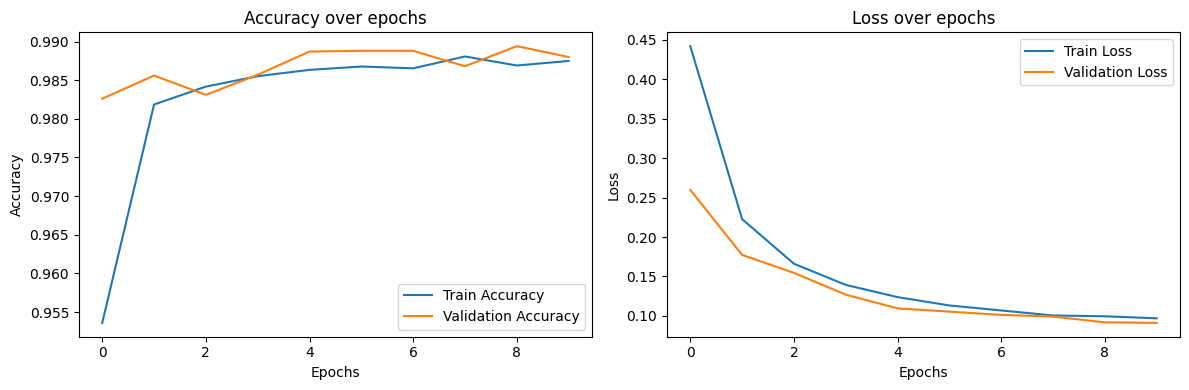

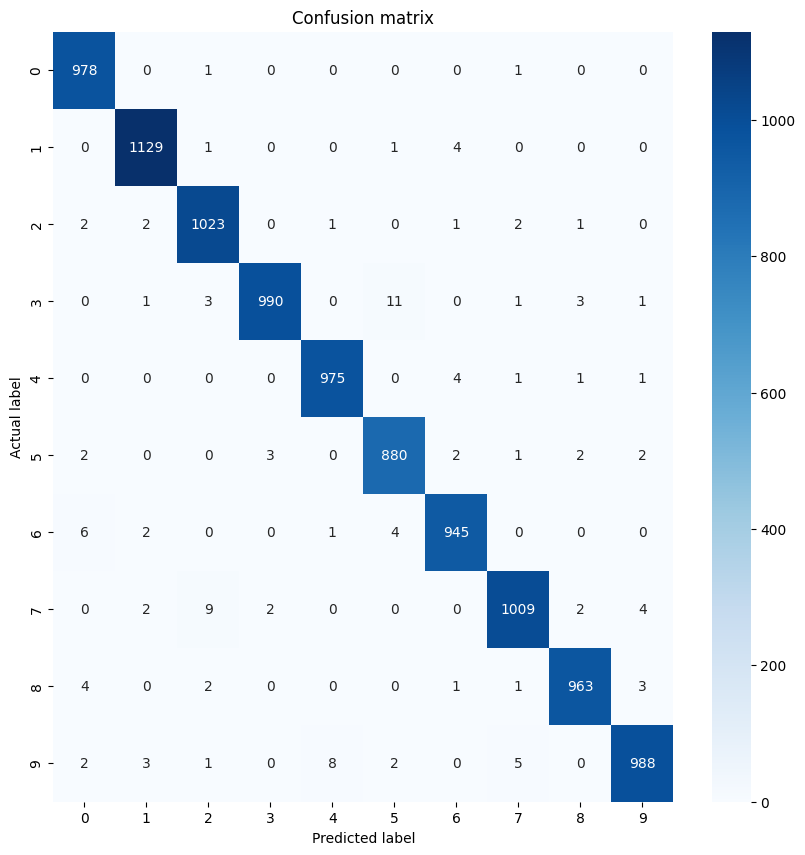

In [7]:
# Reshape the images to have 1 color channel
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

create_model(layers=[
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

create_model(layers=[
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])

create_model(layers=[
    Conv2D(32, (3, 3), activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001), input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=he_normal(), kernel_regularizer=l2(0.001)),
    Dense(10, activation='softmax')
])